In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
from scipy.optimize import minimize

In [31]:
dataTT = loadmat(f"Data04-08_TT_UltVag_Cut.mat")
dataVG = loadmat(f"Data04-08_VG_UltVag_Cut.mat")

dataBaseline = dataTT['Baseline']
dataCincoP = dataTT['CincoP']
dataDez = dataTT['DezP']
dataVinte = dataTT['VinteP']

X_test = pd.DataFrame()

X_train = pd.DataFrame(dataBaseline)

dataBaseline_df = pd.DataFrame(dataBaseline)


dataCincoP_df = pd.DataFrame(dataCincoP)
X_test = pd.concat([X_test, dataCincoP_df], ignore_index=True)

dataDez_df = pd.DataFrame(dataDez)
X_test = pd.concat([X_test, dataDez_df], ignore_index=True)

dataVinte_df = pd.DataFrame(dataVinte)
X_test = pd.concat([X_test, dataVinte_df], ignore_index=True)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [32]:
class AutoencoderHandler:
    def __init__(self, X_train):
        self.X_train = X_train

    def hyperparams_opt_function(self, params):
        sparsity, rho, beta, epsilon, l1_lambda, weight_variance = params

        num_terms = self.X_train.columns.shape[0]
        input_layer = Input(shape=(num_terms,))
        encoded = Dense(128, activation='relu')(input_layer)
        encoded = Dense(64, activation='relu')(encoded)
        encoded = Dense(32, activation='relu')(encoded)
        encoded_sparse = Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l1(l1_lambda))(encoded)
        decoded = Dense(32, activation='relu')(encoded_sparse)
        decoded = Dense(64, activation='relu')(decoded)
        decoded = Dense(128, activation='relu')(decoded)
        decoded = Dense(num_terms, activation='sigmoid')(decoded)

        autoencoder = Model(inputs=input_layer, outputs=decoded)

        activity_loss = beta * tf.keras.backend.sum(tf.keras.backend.square(rho - tf.keras.backend.mean(encoded_sparse, axis=0)))
        autoencoder.add_loss(activity_loss)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=epsilon)
        autoencoder.compile(optimizer=optimizer, loss='mse')
        autoencoder.fit(self.X_train, self.X_train, epochs=50, batch_size=64, verbose=0)

        losses = autoencoder.history.history["loss"]
        loss_variance = tf.math.reduce_variance(losses).numpy()
        weighted_loss = losses[-1] + weight_variance * loss_variance

        return weighted_loss

    def optimize_hyperparameters(self, initial_params):
        result = minimize(self.hyperparams_opt_function, initial_params, method='L-BFGS-B', bounds=[(0, 1), (0, 1), (0, None), (0, None), (0, None), (0, None)])
        optimal_params = result.x
        optimal_cost = result.fun

        print("Hiperparâmetros otimizados:", optimal_params)
        print("Custo otimizado:", optimal_cost)

    def final_loss(self, sparsity, rho, beta, epsilon, l1_lambda):
        num_terms = self.X_train.columns.shape[0]
        input_layer = Input(shape=(num_terms,))
        encoded = Dense(128, activation='relu')(input_layer)
        encoded = Dense(64, activation='relu')(encoded)
        encoded = Dense(32, activation='relu')(encoded)
        encoded_sparse = Dense(16, activation='relu', activity_regularizer=tf.keras.regularizers.l1(l1_lambda))(encoded)
        decoded = Dense(32, activation='relu')(encoded_sparse)
        decoded = Dense(64, activation='relu')(decoded)
        decoded = Dense(128, activation='relu')(decoded)
        decoded = Dense(num_terms, activation='sigmoid')(decoded)

        autoencoder = Model(inputs=input_layer, outputs=decoded)

        activity_loss = beta * tf.keras.backend.sum(tf.keras.backend.square(rho - tf.keras.backend.mean(encoded_sparse, axis=0)))
        autoencoder.add_loss(activity_loss)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=epsilon)
        autoencoder.compile(optimizer=optimizer, loss='mse')
        autoencoder.fit(self.X_train, self.X_train, epochs=50, batch_size=64, verbose=0)

        cost = autoencoder.history.history["loss"][-1]
        
        return cost

    def all_losses(self, sparsity, rho, beta, epsilon, l1_lambda):
        num_terms = self.X_train.columns.shape[0]
        input_layer = Input(shape=(num_terms,))
        encoded = Dense(128, activation='relu')(input_layer)
        encoded = Dense(64, activation='relu')(encoded)
        encoded = Dense(32, activation='relu')(encoded)
        encoded_sparse = Dense(16, activation='relu', activity_regularizer=tf.keras.regularizers.l1(l1_lambda))(encoded)
        decoded = Dense(32, activation='relu')(encoded_sparse)
        decoded = Dense(64, activation='relu')(decoded)
        decoded = Dense(128, activation='relu')(decoded)
        decoded = Dense(num_terms, activation='sigmoid')(decoded)

        autoencoder = Model(inputs=input_layer, outputs=decoded)

        activity_loss = beta * tf.keras.backend.sum(tf.keras.backend.square(rho - tf.keras.backend.mean(encoded_sparse, axis=0)))
        autoencoder.add_loss(activity_loss)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=epsilon)
        autoencoder.compile(optimizer=optimizer, loss='mse')
        autoencoder.fit(self.X_train, self.X_train, epochs=50, batch_size=64, verbose=0)

        cost = autoencoder.history.history["loss"]

        return cost
    
    def model(self):
        num_terms = self.X_train.columns.shape[0]
        input_layer = Input(shape=(num_terms,))
        encoded = Dense(128, activation='relu')(input_layer)
        encoded = Dense(64, activation='relu')(encoded)
        encoded = Dense(32, activation='relu')(encoded)
        encoded_sparse = Dense(16, activation='relu', activity_regularizer=tf.keras.regularizers.l1(1.00000067e-03))(encoded)
        decoded = Dense(32, activation='relu')(encoded_sparse)
        decoded = Dense(64, activation='relu')(decoded)
        decoded = Dense(128, activation='relu')(decoded)
        decoded = Dense(num_terms, activation='linear')(decoded)

        autoencoder = Model(inputs=input_layer, outputs=decoded)

        activity_loss = 2.99999999e+00 * tf.keras.backend.sum(tf.keras.backend.square(4.99999990e-02 - tf.keras.backend.mean(encoded_sparse, axis=0)))
        autoencoder.add_loss(activity_loss)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1.20481896e-02)
        autoencoder.compile(optimizer=optimizer, loss='mse')
        autoencoder.fit(self.X_train, self.X_train, epochs=50, batch_size=64, verbose=0)

        return autoencoder
    
    def MSE_Dano(self, dadoAnalisado, label=None, ax=None):
        x = np.arange(0, 5830)  # Marcando os pontos coletados
        AE = self.model()

        MSE_Medio = np.array([])  # Corrigindo a chamada para np.array([])

        for i in range(dadoAnalisado.shape[0]):
            y = np.array(dadoAnalisado.iloc[i])
            y_predict = AE.predict(dadoAnalisado.iloc[i].values.reshape(1, -1), verbose=0)
            y_predict = y_predict[0]

            MSE_Atual = np.mean((y_predict - y) ** 2)  # Calculando o MSE atual e usando np.mean()
            MSE_Medio = np.append(MSE_Medio, MSE_Atual)
                    
        print(f"MSE Medio Total {label} : {MSE_Medio.mean()}")

        # Plotando os pontos coletados em um gráfico de dispersão
        ax.scatter(x[:dadoAnalisado.shape[0]], MSE_Medio, label=label, alpha=0.5)
        ax.set_xlabel("Iteração")
        ax.set_ylabel("Erro Quadrado Médio (MSE)")
        ax.legend()


        
    # Função para mostrar a plotagem
    def show_plot(self):
        plt.show()



In [33]:
autoencoder_handler = AutoencoderHandler(X_train)
initial_params = [0.1, 0.05, 3.0, 1e-5, 0.001, 0.1]
autoencoder_handler.optimize_hyperparameters(initial_params)

Hiperparâmetros otimizados: [1.00000000e-01 5.00000000e-02 3.00000000e+00 1.00000181e-05
 1.00000005e-03 1.00000000e-01]
Custo otimizado: 0.27570762942780913


In [34]:
loss_final = AutoencoderHandler(X_train)
loss_final.final_loss(sparsity= 9.99999999e-02, rho= 4.99999990e-02, beta= 2.99999999e+00, epsilon= 1.20481896e-05, l1_lambda= 1.00000067e-03)

0.260905921459198

Text(0, 0.5, 'Loss')

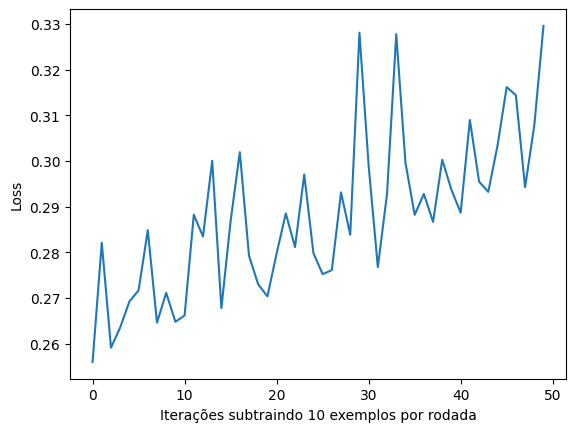

In [35]:
#Análise do aumento do loss com a diminuição da quantidade de dados

X_train_Loss = X_train
loss_atual = []
num_rodagens = 0
while X_train_Loss.shape[0] > 10: #Enquanto for maior que 100 dados
    loss_final = AutoencoderHandler(X_train_Loss)
    loss_atual.append(loss_final.final_loss(sparsity= 9.99999999e-02, rho= 4.99999990e-02, beta= 2.99999999e+00, epsilon= 1.20481896e-05, l1_lambda= 1.00000067e-03))
    num_rodagens += 1
    drop_indices = np.random.choice(X_train_Loss.index, 20, replace=False) # Remove 10 dados aleatórios
    X_train_Loss = X_train_Loss.drop(drop_indices)

arangeIters = np.arange(0, num_rodagens)

plt.plot(arangeIters, loss_atual)
plt.xlabel("Iterações subtraindo 10 exemplos por rodada")
plt.ylabel("Loss")

MSE Medio Total MSEBaseline : 0.0034503177593340887
MSE Medio Total MSECinco : 0.003351188402328644
MSE Medio Total MSEDez : 0.003456582958023631
MSE Medio Total MSEVinte : 0.0034464124244790134


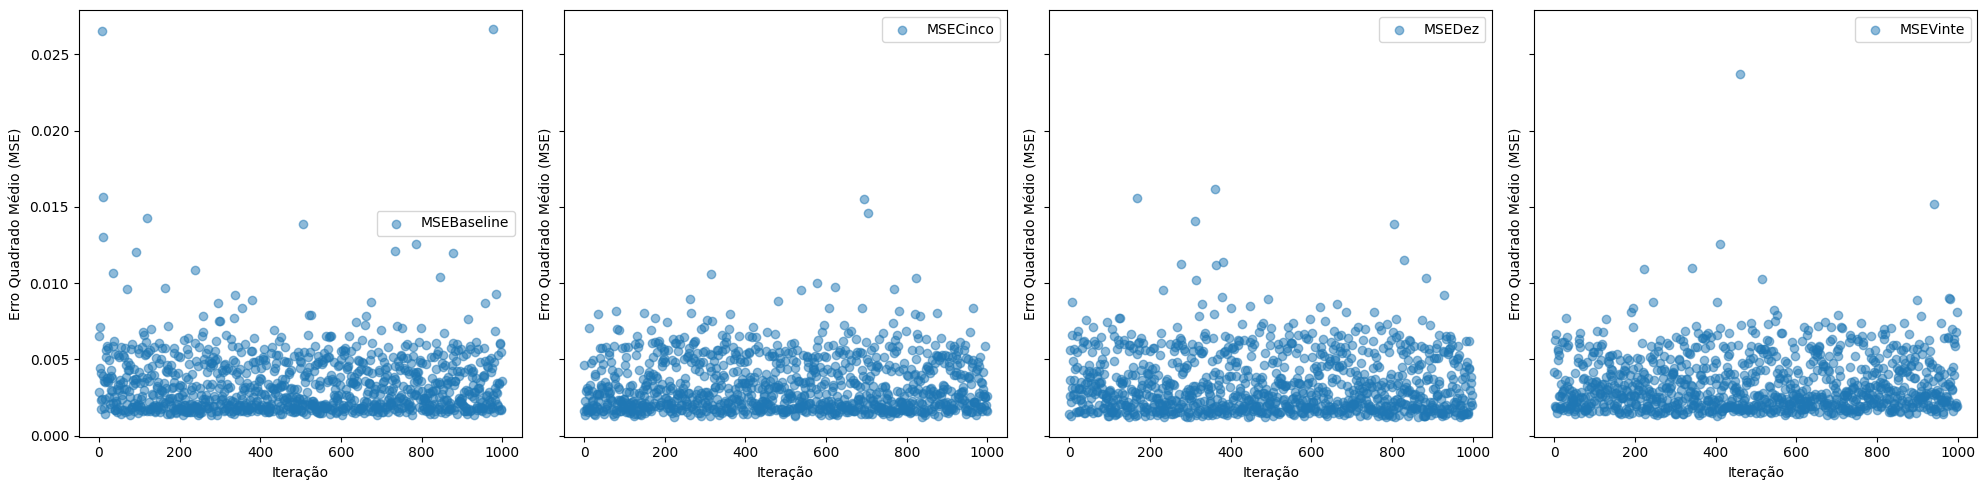

In [36]:
# Criando subplots para cada tipo de dano
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Exemplo de uso
handler = AutoencoderHandler(X_train)

# Adicionando quatro plots, um para cada tipo de dano
handler.MSE_Dano(dataBaseline_df, label="MSEBaseline", ax=axes[0])

handler.MSE_Dano(dataCincoP_df, label="MSECinco", ax=axes[1])

handler.MSE_Dano(dataDez_df, label="MSEDez", ax=axes[2])

handler.MSE_Dano(dataVinte_df, label="MSEVinte", ax=axes[3])

# Ajustando o layout do grid
plt.tight_layout()
plt.show()
